---
title: Regularization methods - lasso, ridge, and elastic net
teaching: 45
exercises: 2
keypoints:
- ""
objectives:
- ""
questions:
- "How can LASSO regularization be used as a feature selection method?"
---

## Introduction to the LASSO Model in high-dimensional data analysis
In the realm of high-dimensional data analysis, where the number of predictors begins to approach or exceed the number of observations, traditional regression methods can become challenging to implement and interpret. The Least Absolute Shrinkage and Selection Operator (LASSO) offers a powerful solution to address the complexities of high-dimensional datasets. This technique, introduced by Robert Tibshirani in 1996, has gained immense popularity due to its ability to provide both effective prediction and feature selection.

The LASSO model is a regularization technique designed to combat overfitting by adding a penalty term to the regression equation. The essence of the LASSO lies in its ability to shrink the coefficients of less relevant predictors towards zero, effectively "shrinking" them out of the model. This not only enhances model interpretability by identifying the most important predictors but also reduces the risk of multicollinearity and improves predictive accuracy.

LASSO's impact on high-dimensional data analysis is profound. It provides several benefits:

* Feature Selection / Interpretability: The LASSO identifies and retains the most relevant predictors. With a reduced set of predictors, the model becomes more interpretable, enabling researchers to understand the driving factors behind the predictions.

* Regularization / Dimensionality Reduction: The L1 penalty prevents overfitting by constraining the coefficients, even in cases with a large number of predictors. The L1 penality inherently reduces the dimensionality of the model, making it suitable for settings where the number of predictors is much larger than the sample size.

* Improved Generalization: Related to the above point, LASSO's feature selection capabilities contribute to better generalization and prediction performance on unseen data.

* Data Efficiency: LASSO excels when working with limited samples, offering meaningful insights despite limited observations.

### The L1 penalty
The key concept behind the LASSO is its use of the L1 penalty, which is defined as the sum of the absolute values of the coefficients (parameters) of the model, multiplied by a regularization parameter (usually denoted as λ or alpha).

In the context of linear regression, the L1 penalty can be incorporated into the ordinary least squares (OLS) loss function as follows:

![LASSO Model](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Lasso.png)


Where:

* λ (lambda) is the regularization parameter that controls the strength of the penalty. Higher values of λ lead to stronger regularization and more coefficients being pushed towards zero.
* βi is the coefficient associated with the i-th predictor.

The L1 penalty has a unique property that it promotes sparsity. This means that it encourages some coefficients to be exactly zero, effectively performing feature selection. In contrast to the L2 penalty (Ridge penalty), which squares the coefficients and promotes small but non-zero values, the L1 penalty tends to lead to sparse solutions where only a subset of predictors are chosen. As a result, the LASSO automatically performs feature selection, which is especially advantageous when dealing with high-dimensional datasets where many predictors may have negligible effects on the outcome.

## Compare full-dim and LASSO results

### Load full dim, zscored, data
We'll use most of the data for the test set so that this dataset's dimensionality begins to approach the number of observations. Regularization techniques such as LASSO tend to shine when working in this context. If you have plenty of data to estimate each coefficient, you will typically find that an unregularized model performs better.

In [1]:
from preprocessing import prep_fulldim_zdata
X_train_z, X_test_z, y_train, y_test, y = prep_fulldim_zdata(const_thresh= 86, test_size=.93, y_log_scaled=True)
X_train_z.head()

164 columns removed, 51 remaining.
Columns removed: ['PoolArea', 'LotFrontage', 'BsmtFinSF2', 'ScreenPorch', 'GarageYrBlt', 'MasVnrArea', 'KitchenAbvGr', '3SsnPorch', 'BsmtHalfBath', 'LowQualFinSF', 'Foundation_BrkTil', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'GarageType_2Types', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', "MSZoning_'C (all)'", 'MSZoning_FV', 'MSZoning_RH', "Exterior2nd_'Brk Cmn'", "Exterior2nd_

,GrLivArea,OpenPorchSF,1stFlrSF,YearBuilt,TotalBsmtSF,TotRmsAbvGrd,BsmtFinSF1,GarageArea,YrSold,YearRemodAdd,...,LotConfig_Corner,LotConfig_Inside,HouseStyle_1Story,HouseStyle_2Story,MSSubClass_20,MSSubClass_60,SaleCondition_Normal,MasVnrType_BrkFace,MasVnrType_None,BldgType_1Fam
368,-0.445068,0.942450,0.362455,-0.929703,0.634862,0.453853,0.268800,-1.122146,1.549150,-1.626427,...,-0.567003,0.719212,0.956799,-0.73492,1.189355,-0.582023,0.429212,1.407264,-1.097933,0.506673
973,-0.083375,1.315704,0.807446,1.259310,1.045635,-0.198161,-1.058334,0.111518,0.181069,1.184480,...,1.746369,-1.376778,0.956799,-0.73492,1.189355,-0.582023,-2.307012,-0.703632,-1.097933,0.506673
387,-0.768331,-0.720227,-0.035256,-0.021056,0.052077,-0.198161,0.492447,-0.557588,0.865110,-0.481243,...,-0.567003,0.719212,-1.034905,-0.73492,-0.832549,-0.582023,-2.307012,1.407264,-1.097933,0.506673
816,-1.032819,-0.720227,-0.360655,-0.929703,-0.032645,-1.502190,0.136087,-0.960097,-1.187011,-1.626427,...,1.746369,-1.376778,0.956799,-0.73492,1.189355,-0.582023,0.429212,-0.703632,0.901873,0.506673
1316,0.373261,-0.007651,1.369247,1.300612,1.543698,1.105868,-1.058334,2.097925,0.865110,1.184480,...,-0.567003,0.719212,0.956799,-0.73492,1.189355,-0.582023,0.429212,-0.703632,-1.097933,0.506673


In [2]:
print(X_train_z.shape)

(102, 51)


## Intro to LassoCV
LassoCV in scikit-learn performs cross-validation to find the best alpha value (lambdas in traditional LASSO equation) from the specified list of alphas. It does this by fitting a separate LASSO regression for each alpha value on each fold of the cross-validation. The alphas parameter determines the values of alpha to be tested.

The LassoCV model doesn't store a reference to all individual models tested during cross-validation. Instead, it stores the coefficients, alpha values, and other relevant information for the best-performing model. By default, the LassoCV model returns the best model that was determined based on cross-validation performance. This best model's coefficients can be accessed using the .coef_ attribute, and the optimal alpha can be accessed using the .alpha_ attribute.

* **max_iter**: This is the maximum number of iterations for which we want the model to run if it doesn’t converge before. The default value is 1000
* **cv**: The number of folds to use during cross-validation
* **alphas**: The alphas you want to evaluate during cross-validation

In [3]:
from sklearn.linear_model import LassoCV
# help(LassoCV)

### Specify range of alphas
Specify a range of alpha values. Typically, small alphas work well. However, you don't want to be so close to zero that you get no benefits from regularization (i.e., none of the coefs shrink to zero).

In [4]:
import numpy as np
alphas = np.logspace(-4, 1, 300)
print(alphas[0:10])
max_iter = 100000
cv = 5

[0.0001     0.00010393 0.00010801 0.00011225 0.00011665 0.00012123
 0.00012599 0.00013094 0.00013608 0.00014142]


### Call LassoCV


In [5]:
reg = LassoCV(alphas=alphas, cv=cv, max_iter=max_iter, random_state=0)
reg = reg.fit(X_train_z, y_train)

### Randomness in LassoCV
LassoCV uses coordinate descent, which is a convex optimization algorithm meaning that it solves for a global optimum (one possible optimal error).

However, during coordinate descent, when multiple features are highly correlated, the algorithm can choose any one of them to update at each iteration. This can lead to some randomness in the selection of features and the order in which they are updated. While coordinate descent itself is deterministic, the order in which the correlated features are selected can introduce variability.

The random state argument in LassoCV allows you to control this randomness by setting a specific random seed. This can be helpful for reproducibility when working with models that involve correlated features. By specifying a random seed, you ensure that the same features will be chosen in the same order across different runs of the algorithm, making the results more predictable and reproducible.

In summary, while coordinate descent is a convex algorithm, the random state argument in LassoCV helps manage the potential randomness introduced by the selection of correlated features during the optimization process.

## Use fit_eval_model() to quickly compare models

# of predictor vars = 51
# of train observations = 102
# of test observations = 1358
Baseline RMSE = 79415.29188606751
Train RMSE = 14835.039689206178
Holdout RMSE = 112820.25536497237
(Holdout-Train)/Train: 660%


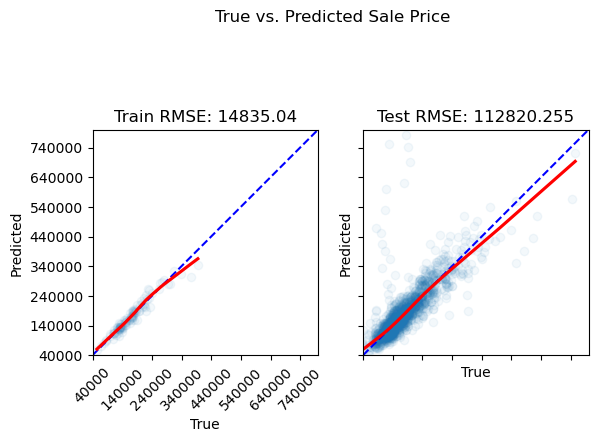


# of predictor vars = 51
# of train observations = 102
# of test observations = 1358
Baseline RMSE = 79415.29188606751
Train RMSE = 18935.63680029539
Holdout RMSE = 56992.74351917894
(Holdout-Train)/Train: 201%


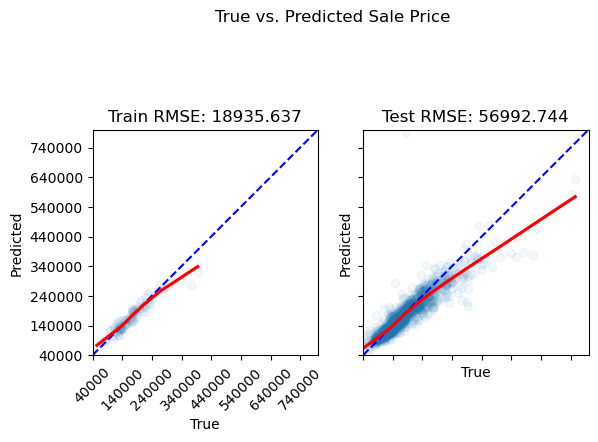

In [6]:
from regression_predict_sklearn import fit_eval_model

# Full-dim model
trained_model, error_df = fit_eval_model(y=y, baseline_pred=y.mean(),
               X_train=X_train_z, y_train=y_train,
               X_test=X_test_z, y_test=y_test, 
               predictors=X_train_z.columns,
               metric='RMSE',
               y_log_scaled=True,
               model_type='unregularized',
               include_plots=True, plot_raw=True, verbose=True)

# LASSO
import numpy as np
trained_model, error_df = fit_eval_model(y=y, baseline_pred=y.mean(),
                                         X_train=X_train_z, y_train=y_train,
                                         X_test=X_test_z, y_test=y_test, 
                                         predictors=X_train_z.columns,
                                         metric='RMSE',
                                         y_log_scaled=True,
                                         model_type='LassoCV', alphas=alphas, cv=5, max_iter=100000,
                                         include_plots=True, plot_raw=True, verbose=True)

## Investigating sparsity of best LASSO model (returned from LassoCV)

In [7]:
# Get coefficient matrix
coef_matrix = trained_model.coef_
coef_matrix

array([ 0.09580626,  0.01657068,  0.        ,  0.04837551,  0.06444754,
        0.        ,  0.00223178,  0.04002545, -0.01137468,  0.        ,
        0.03003016,  0.        , -0.        , -0.        ,  0.03136104,
        0.01883186,  0.02435751, -0.        ,  0.        ,  0.0456953 ,
        0.        ,  0.05102214,  0.        ,  0.00376516,  0.        ,
        0.02047447, -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.03051899, -0.        ,  0.        ,  0.03235801,
        0.        , -0.        , -0.01383338, -0.00252309,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ])

In [8]:
from interpret_model import coef_plot
help(coef_plot)

Help on function coef_plot in module interpret_model:

coef_plot(coefs: pandas.core.series.Series, plot_const: bool = False, index: bool = None) -> matplotlib.figure.Figure
    Plot coefficient values and feature importance based on sorted feature importance.
    
    Args:
        coefs (pd.Series or np.ndarray): Coefficient values.
        plot_const (bool, optional): Whether or not to plot the y-intercept coef value. Default is False.
        index (list or pd.Index, optional): Index labels for the coefficients. Default is None.
    
    Returns:
        plt.Figure: The figure containing the coefficient plots.



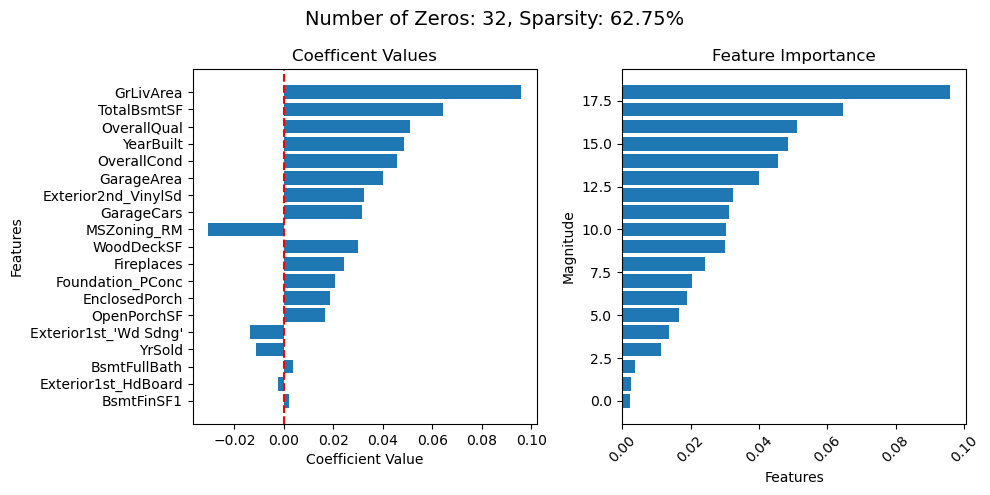

In [9]:
fig = coef_plot(coefs=coef_matrix, plot_const=False, index=X_train_z.columns) 

### Investivating the alpha hyperparameter

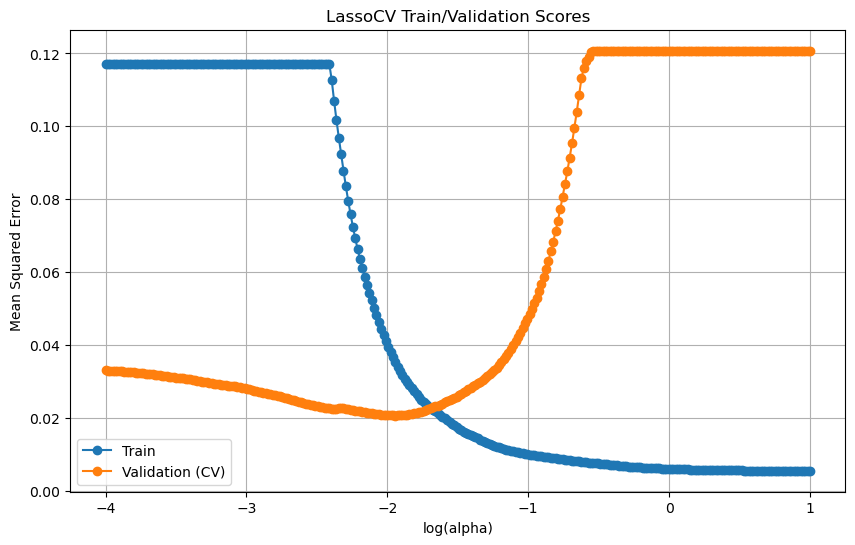

In [10]:
import matplotlib.pyplot as plt
# Calculate the corresponding training scores for each alpha and fold
from sklearn.linear_model import Lasso
train_scores = []

preds = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=max_iter)
    lasso.fit(X_train_z, y_train)
    pred = lasso.predict(X_train_z)
    preds.append(pred)
    train_scores.append(np.mean((pred - y_train) ** 2))

# Retrieve the validation scores at each alpha and fold
val_scores = trained_model.mse_path_

# Plot the training and validation scores
plt.figure(figsize=(10, 6))
plt.plot(np.log10(trained_model.alphas_), train_scores, label='Train', marker='o')
plt.plot(np.log10(trained_model.alphas_), val_scores.mean(axis=1), label='Validation (CV)', marker='o')
plt.xlabel('log(alpha)')
plt.ylabel('Mean Squared Error')
plt.title('LassoCV Train/Validation Scores')
plt.legend()
plt.grid(True)
plt.savefig('..//fig//regression//regularize//alpha_cv_results.png', bbox_inches='tight', dpi=300, facecolor='white');

plt.show()


<img src="../fig/regression/regularize/alpha_cv_results.png"  align="center" width="60%" height="60%">

## Hypothesis testing with LASSO models

In [11]:
# # Calculate p-values for LASSO coefficients
# X_train_with_constant = sm.add_constant(X_train)
# lasso_model = sm.OLS(y_train, X_train_with_constant)
# lasso_results = lasso_model.fit_regularized(alpha=trained_model.alpha_, L1_wt=1.0)

# # Print the summary of LASSO results
# print(lasso_results.summary())
